# Training phase

## Setting up the configuration
Fisrt let's check the configuration parameters in case you want to change some of them base on the previous analysis. In any case the default configuration should **provide you with a good start**.


In [1]:
from imgclas import config

config.print_conf_table()

group                    key                           value                         
augmentation             train_mode                    {}              

augmentation             val_mode                      {}              

---------------------------------------------------------------------------

dataset                  mean_RGB                      [157.30457184530133, 151.2021862648909, 142.17934265827148] 

dataset                  std_RGB                       [46.344004494878085, 48.545987374866094, 55.40459410201918] 

---------------------------------------------------------------------------

general                  base_directory                .               

general                  images_directory              /               

---------------------------------------------------------------------------

model                    image_size                    528             

model                    modelname                     Xception        

model      

In case you want to change the configuration feel free to do so by modifying `etc/config-r.yaml`.

## Training

Once you have set up the configuration if needed you can launch the training by running the file `train_runfile.py`

#### Tips: 
* If you are running several times different training configurations but with the **same** dataset you might consider to add the `mean_RGB` and `std_RGB` parameters to your `config-r.yaml` file. You can find them computed in any of your already trained models by looking into `../models/[timestamp]/conf/conf.txt`.

## Visualizing the training results

### Display a single timestamp

In [8]:
ls ./models/

2023-06-20_123227/  2023-06-21_201005/  2023-06-22_171209/


Total training time: 1 day, 2:29:47


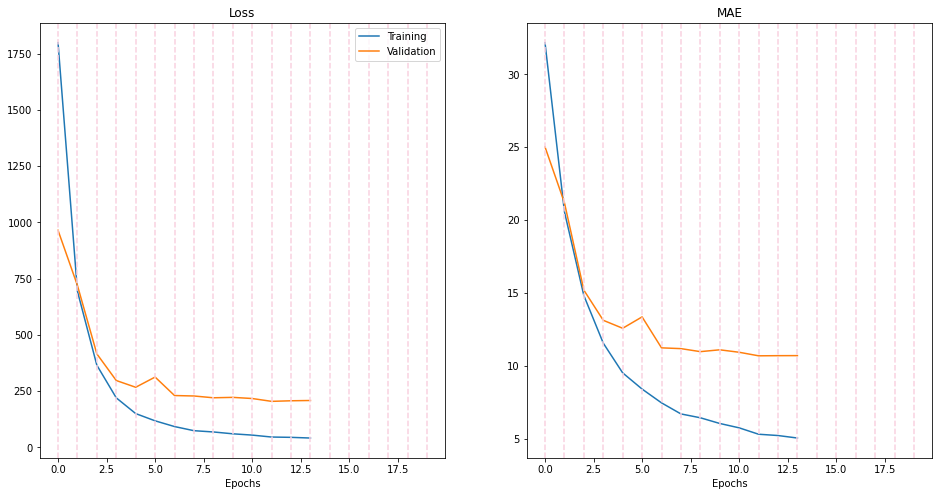

In [1]:
import os
import json
from datetime import timedelta

import matplotlib.pylab as plt
import numpy as np

from imgclas import paths, plot_utils

# User parameters to set
TIMESTAMP = '2023-06-22_171209'             # timestamp of the model

# Set the timestamp
paths.timestamp = TIMESTAMP

# Load training statistics
stats_path = os.path.join(paths.get_stats_dir(), 'stats.json')
with open(stats_path) as f:
    stats = json.load(f)

# Load training configuration
conf_path = os.path.join(paths.get_conf_dir(), 'conf.json')
with open(conf_path) as f:
    conf = json.load(f)

# Plot the trainig plots 
plot_utils.training_plots(conf, stats)

# Print total training time
tr_time = int(stats['training time (s)'])
print('Total training time: {}'.format(timedelta(seconds=tr_time)))

### Compare between multiple timestamps

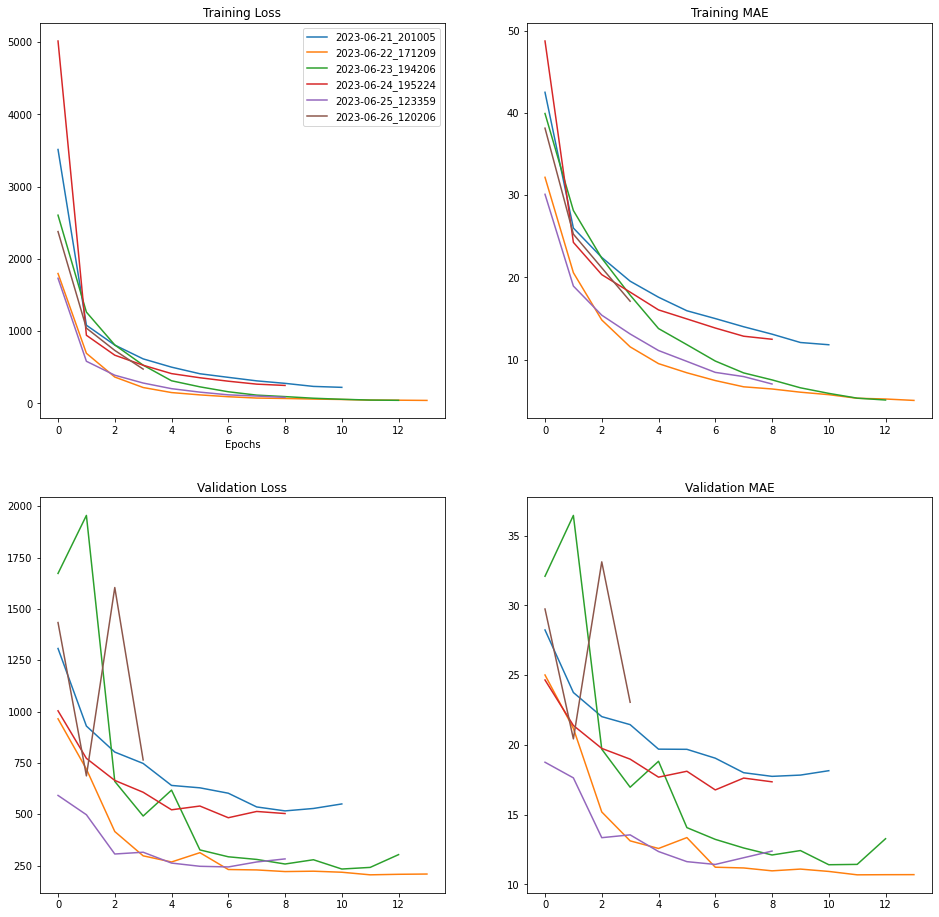

In [1]:
from imgclas.plot_utils import multi_training_plots

TIMESTAMPS = ['2023-06-21_201005',
             '2023-06-22_171209',
             '2023-06-23_194206',
             '2023-06-24_195224', '2023-06-25_123359','2023-06-26_120206']

multi_training_plots(timestamps=TIMESTAMPS)